# Process Renovar CO Data according to reference station

## Constants and imports

In [1]:
input_data_directory = 'input/'
sensor_data_path = input_data_directory + 'alpha_co_concsensor_dataframe_1hr.csv'
temperature_data_path = input_data_directory + 'chamber_tempsensor_dataframe_1hr.csv'
reference_column_name = 'Monóxido de Carbono'

## Load Alphasense CO sensor data

In [2]:
import pandas as pd

sensor_data = pd.read_csv(sensor_data_path).sort_values(by='DateTime', ascending=True)
sensor_data.index = sensor_data['DateTime']
sensor_data = sensor_data.drop(columns='DateTime')
sensor_data

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99
DateTime,,,,,,,,,,,,
2022-11-20 13:30:00,-28.456899,-48.972999,125.92,NaN,0.144255,13,1,NaN,25.0,LOWSAMPLES,11.352500,2172.4600
2022-11-20 14:30:00,NaN,NaN,NaN,NaN,NaN,14,0,NaN,0.0,LOWSAMPLES,10.832500,2171.6100
2022-11-20 15:30:00,NaN,NaN,NaN,NaN,NaN,15,0,NaN,0.0,LOWSAMPLES,12.307500,2177.6800
2022-11-20 16:30:00,NaN,NaN,NaN,NaN,NaN,16,0,NaN,0.0,LOWSAMPLES,6.156667,2262.8825
2022-11-20 17:30:00,NaN,NaN,NaN,NaN,NaN,17,0,NaN,0.0,LOWSAMPLES,10.777500,2203.8625
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23 05:30:00,NaN,NaN,NaN,NaN,NaN,5,0,NaN,0.0,LOWSAMPLES,7.226667,2142.1250
2023-05-23 06:30:00,NaN,NaN,NaN,NaN,NaN,6,0,NaN,0.0,LOWSAMPLES,9.780000,2243.4700
2023-05-23 07:30:00,NaN,NaN,NaN,NaN,NaN,7,0,NaN,0.0,LOWSAMPLES,9.010000,2166.3250


## Load sensor chamber temperature data

In [3]:
import pandas as pd

temperature_data = pd.read_csv(temperature_data_path).sort_values(by='DateTime', ascending=True)
temperature_data.index = temperature_data['DateTime']
temperature_data = temperature_data.drop(columns='DateTime')['measuring']
temperature_data.head()

DateTime
2022-11-21 10:30:00    29.5500
2022-11-21 11:30:00    30.6400
2022-11-21 12:30:00    31.3075
2022-11-21 13:30:00    31.5700
2022-11-21 14:30:00    31.6500
Name: measuring, dtype: float64

### Select period of interest according to CO sensor data

In [4]:
temperature_data = temperature_data[temperature_data.index >= sensor_data.index[0]]
temperature_data = temperature_data[temperature_data.index <= sensor_data.index[-1]]
temperature_data

DateTime
2022-11-21 10:30:00    29.5500
2022-11-21 11:30:00    30.6400
2022-11-21 12:30:00    31.3075
2022-11-21 13:30:00    31.5700
2022-11-21 14:30:00    31.6500
                        ...   
2023-04-21 17:30:00    29.4475
2023-04-21 18:30:00    26.2125
2023-04-21 19:30:00    24.9625
2023-04-21 20:30:00    24.1900
2023-04-21 21:30:00    23.8150
Name: measuring, Length: 3636, dtype: float64

## Append reference column to CO sensor Data

In [5]:
sensor_data['temperature'] = temperature_data
sensor_data

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99,temperature
DateTime,,,,,,,,,,,,,
2022-11-20 13:30:00,-28.456899,-48.972999,125.92,NaN,0.144255,13,1,NaN,25.0,LOWSAMPLES,11.352500,2172.4600,NaN
2022-11-20 14:30:00,NaN,NaN,NaN,NaN,NaN,14,0,NaN,0.0,LOWSAMPLES,10.832500,2171.6100,NaN
2022-11-20 15:30:00,NaN,NaN,NaN,NaN,NaN,15,0,NaN,0.0,LOWSAMPLES,12.307500,2177.6800,NaN
2022-11-20 16:30:00,NaN,NaN,NaN,NaN,NaN,16,0,NaN,0.0,LOWSAMPLES,6.156667,2262.8825,NaN
2022-11-20 17:30:00,NaN,NaN,NaN,NaN,NaN,17,0,NaN,0.0,LOWSAMPLES,10.777500,2203.8625,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23 05:30:00,NaN,NaN,NaN,NaN,NaN,5,0,NaN,0.0,LOWSAMPLES,7.226667,2142.1250,NaN
2023-05-23 06:30:00,NaN,NaN,NaN,NaN,NaN,6,0,NaN,0.0,LOWSAMPLES,9.780000,2243.4700,NaN
2023-05-23 07:30:00,NaN,NaN,NaN,NaN,NaN,7,0,NaN,0.0,LOWSAMPLES,9.010000,2166.3250,NaN


### Plot reference and sensor data

<Axes: xlabel='DateTime'>

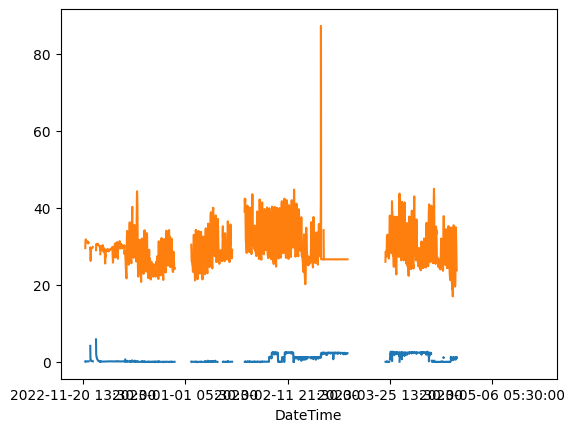

In [6]:
sensor_data['value'].plot()
sensor_data['temperature'].plot()

## Separate reference data and valid sensor data

In [7]:
data = sensor_data[sensor_data['Tag'] == 'VALID'][['value', 'temperature']]
data

,value,temperature
DateTime,,
2022-11-21 11:30:00,0.088616,30.6400
2022-11-21 12:30:00,0.084772,31.3075
2022-11-21 13:30:00,0.075427,31.5700
2022-11-21 14:30:00,0.101650,31.6500
2022-11-21 15:30:00,0.170962,31.8425
...,...,...
2023-04-21 17:30:00,0.963363,29.4475
2023-04-21 18:30:00,1.071780,26.2125
2023-04-21 19:30:00,0.955249,24.9625


## Plot sensor vs. reference

Spearmans correlation coefficient: 0.120
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: 0.120
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=0.094, p<0.05")

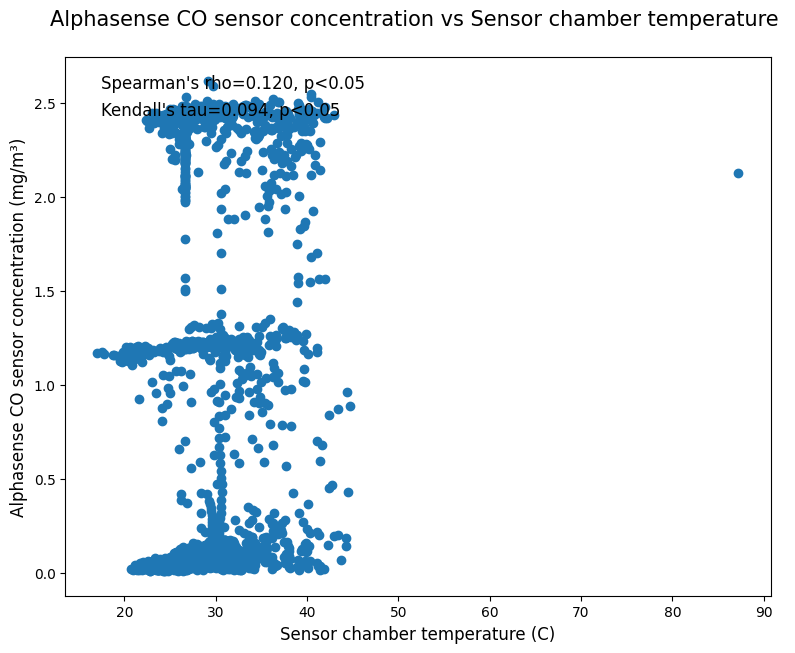

In [8]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))

plt.scatter(data['temperature'], data['value'])
plt.title('Alphasense CO sensor concentration vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.xlabel('Sensor chamber temperature (C)', 
           fontsize=12)
plt.ylabel('Alphasense CO sensor concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(data['temperature'], data['value'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau( data['temperature'], data['value'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)